<a href="https://colab.research.google.com/github/elsaimo/4105/blob/main/Notebooks/Exercise_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch

In [2]:
# t_c is the temperature in celcius; this is our known output.
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
# t_u is the temperature in unknown unit; this is our feature.
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

# Try yourself: Convert these arrays into tensors.
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

print (t_c)
print (t_u)

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])
tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])


In [3]:
# model definition based on weight w and bias b
def model(t_u, w, b):
    return w * t_u + b

In [4]:
# Loss definition
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [5]:
w = torch.ones(())
b = torch.zeros(())

# t_p is the predicted output for the current value of w and b
t_p = model(t_u, w, b)
# Try yourself: print the predicted values t_p
print (t_p)

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])


In [6]:
loss = loss_fn(t_p, t_c)
# Try yourself: print loss
print (loss)

tensor(1763.8848)


In [7]:
# let's normalize the input; you can use the standard way to do normalization; Here we have done a crude normalization so that our two featues are in the similar range.
t_un = 0.1*t_u

In [8]:
# here we define an optimizer for optimizing the parameters of our linear model
import torch.optim as optim
params = torch.tensor([w,b],requires_grad=True)  # notice that requires_grad defines that it is associated with a graph and gradeint will be computed when we call the step function.
learning_rate = 1e-5
optimizer = optim.SGD([params],lr = learning_rate)
# try yourself: print the params.
# try yourself: print the gradient.
print (params)
print (params.grad)

tensor([1., 0.], requires_grad=True)
None


In [10]:
# Let's do one iteration of training: one forward and one backward pass to update the gradient and the parameters.
t_p = model(t_u,*params)
loss = loss_fn(t_p,t_c)
loss.backward()
# try yourself: print the params. Have the values been updated?
# try yourself: print the gradient. Have the values been updated?
print (params)
print (params.grad)
optimizer.step()
# try yourself: print the params. Have the values been updated?
# try yourself: print the gradient. Have the values been updated?
print ("===============")
print (params)
print (params.grad)



tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)
tensor([8768.8184,  160.5184])
tensor([ 0.8671, -0.0024], requires_grad=True)
tensor([8768.8184,  160.5184])


In [11]:
# Now we will do training for 5000 iteration to find the optimum value of the parameters.
def training_loop(n_epochs, optimizer, params, t_u,t_c):
  for epoch in range(1,n_epochs+1):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p,t_c)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
      print(params)
      print(params.grad)
  return params

In [15]:
params = torch.tensor([w,b],requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params],lr = learning_rate)
# Try yourself: call training_loop function for 5000 epochs.
n_epochs = 5000
x = training_loop(n_epochs, optimizer, params, t_u,t_c)
# Try yourself: print the params values
print (params)  # notice that the values have been updated.

Epoch 500, Loss nan
tensor([nan, nan], requires_grad=True)
tensor([nan, nan])
Epoch 1000, Loss nan
tensor([nan, nan], requires_grad=True)
tensor([nan, nan])
Epoch 1500, Loss nan
tensor([nan, nan], requires_grad=True)
tensor([nan, nan])
Epoch 2000, Loss nan
tensor([nan, nan], requires_grad=True)
tensor([nan, nan])
Epoch 2500, Loss nan
tensor([nan, nan], requires_grad=True)
tensor([nan, nan])
Epoch 3000, Loss nan
tensor([nan, nan], requires_grad=True)
tensor([nan, nan])
Epoch 3500, Loss nan
tensor([nan, nan], requires_grad=True)
tensor([nan, nan])
Epoch 4000, Loss nan
tensor([nan, nan], requires_grad=True)
tensor([nan, nan])
Epoch 4500, Loss nan
tensor([nan, nan], requires_grad=True)
tensor([nan, nan])
Epoch 5000, Loss nan
tensor([nan, nan], requires_grad=True)
tensor([nan, nan])
tensor([nan, nan], requires_grad=True)


## Training and Validation in PyTorch

In [16]:
# splitting a dataset into 8:2 ratio
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
# Try yourself: print train_indices and val_indices. see if the number of training and validation match with our intended ratio
print (train_indices)
print (val_indices)

tensor([10,  9,  3,  5,  0,  8,  4,  2,  7])
tensor([6, 1])


In [17]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

In [18]:
# crude normalization
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [19]:
def training_loop(n_epochs, optimizer, params, train_t_u,val_t_u, train_t_c,val_t_c):
  for epoch in range(1,n_epochs+1):

    # Try yourself: identif (i) where we are doing forward pass on the training data,
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)
    # (ii)  where we are doing forward pass on the validation data,
    val_t_p = model(val_t_u, *params)
    val_loss = loss_fn(val_t_p, val_t_c)
    # (iii) where we are computing the gradient on training data
    optimizer.zero_grad()
    train_loss.backward()
    # (iv) and where we are updating the paramter values on training data (iii and iV constitute the backward pass)
    optimizer.step()
    # (v) where we are doing the backwass pass on validation data




    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)

    val_t_p = model(val_t_u, *params)
    val_loss = loss_fn(val_t_p, val_t_c)


    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch<= 3 or epoch % 500 == 0:
      print('Epoch %d, Training Loss %f, Validation Loss %f' % (epoch, float(train_loss), float(val_loss)))
      print(params)
      print(params.grad)
  return params

In [20]:
params = torch.tensor([1.0,0.0],requires_grad = True)
learning_rate = 1e-2
optimizer = optim.SGD([params],lr = learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

# try yourself: print the final values of the parameters. What will be the predicted output if the temperature at unknow unit is 80.
print (params)

Epoch 1, Training Loss 40.743099, Validation Loss 12.037375
tensor([2.1537, 0.1318], requires_grad=True)
tensor([-30.6631,  -1.9622])
Epoch 2, Training Loss 33.383331, Validation Loss 12.267288
tensor([2.3110, 0.0931], requires_grad=True)
tensor([-4.4027,  2.5287])
Epoch 3, Training Loss 33.057194, Validation Loss 12.730581
tensor([2.3406, 0.0327], requires_grad=True)
tensor([-1.0387,  3.0942])
Epoch 500, Training Loss 3.695302, Validation Loss 2.058008
tensor([  4.9418, -15.1231], requires_grad=True)
tensor([-0.0992,  0.5784])
Epoch 1000, Training Loss 2.722513, Validation Loss 4.496119
tensor([  5.4157, -17.8873], requires_grad=True)
tensor([-0.0179,  0.1042])
Epoch 1500, Training Loss 2.690957, Validation Loss 5.079551
tensor([  5.5010, -18.3851], requires_grad=True)
tensor([-0.0032,  0.0188])
Epoch 2000, Training Loss 2.689934, Validation Loss 5.189288
tensor([  5.5164, -18.4748], requires_grad=True)
tensor([-0.0006,  0.0034])
Epoch 2500, Training Loss 2.689899, Validation Loss 5.2

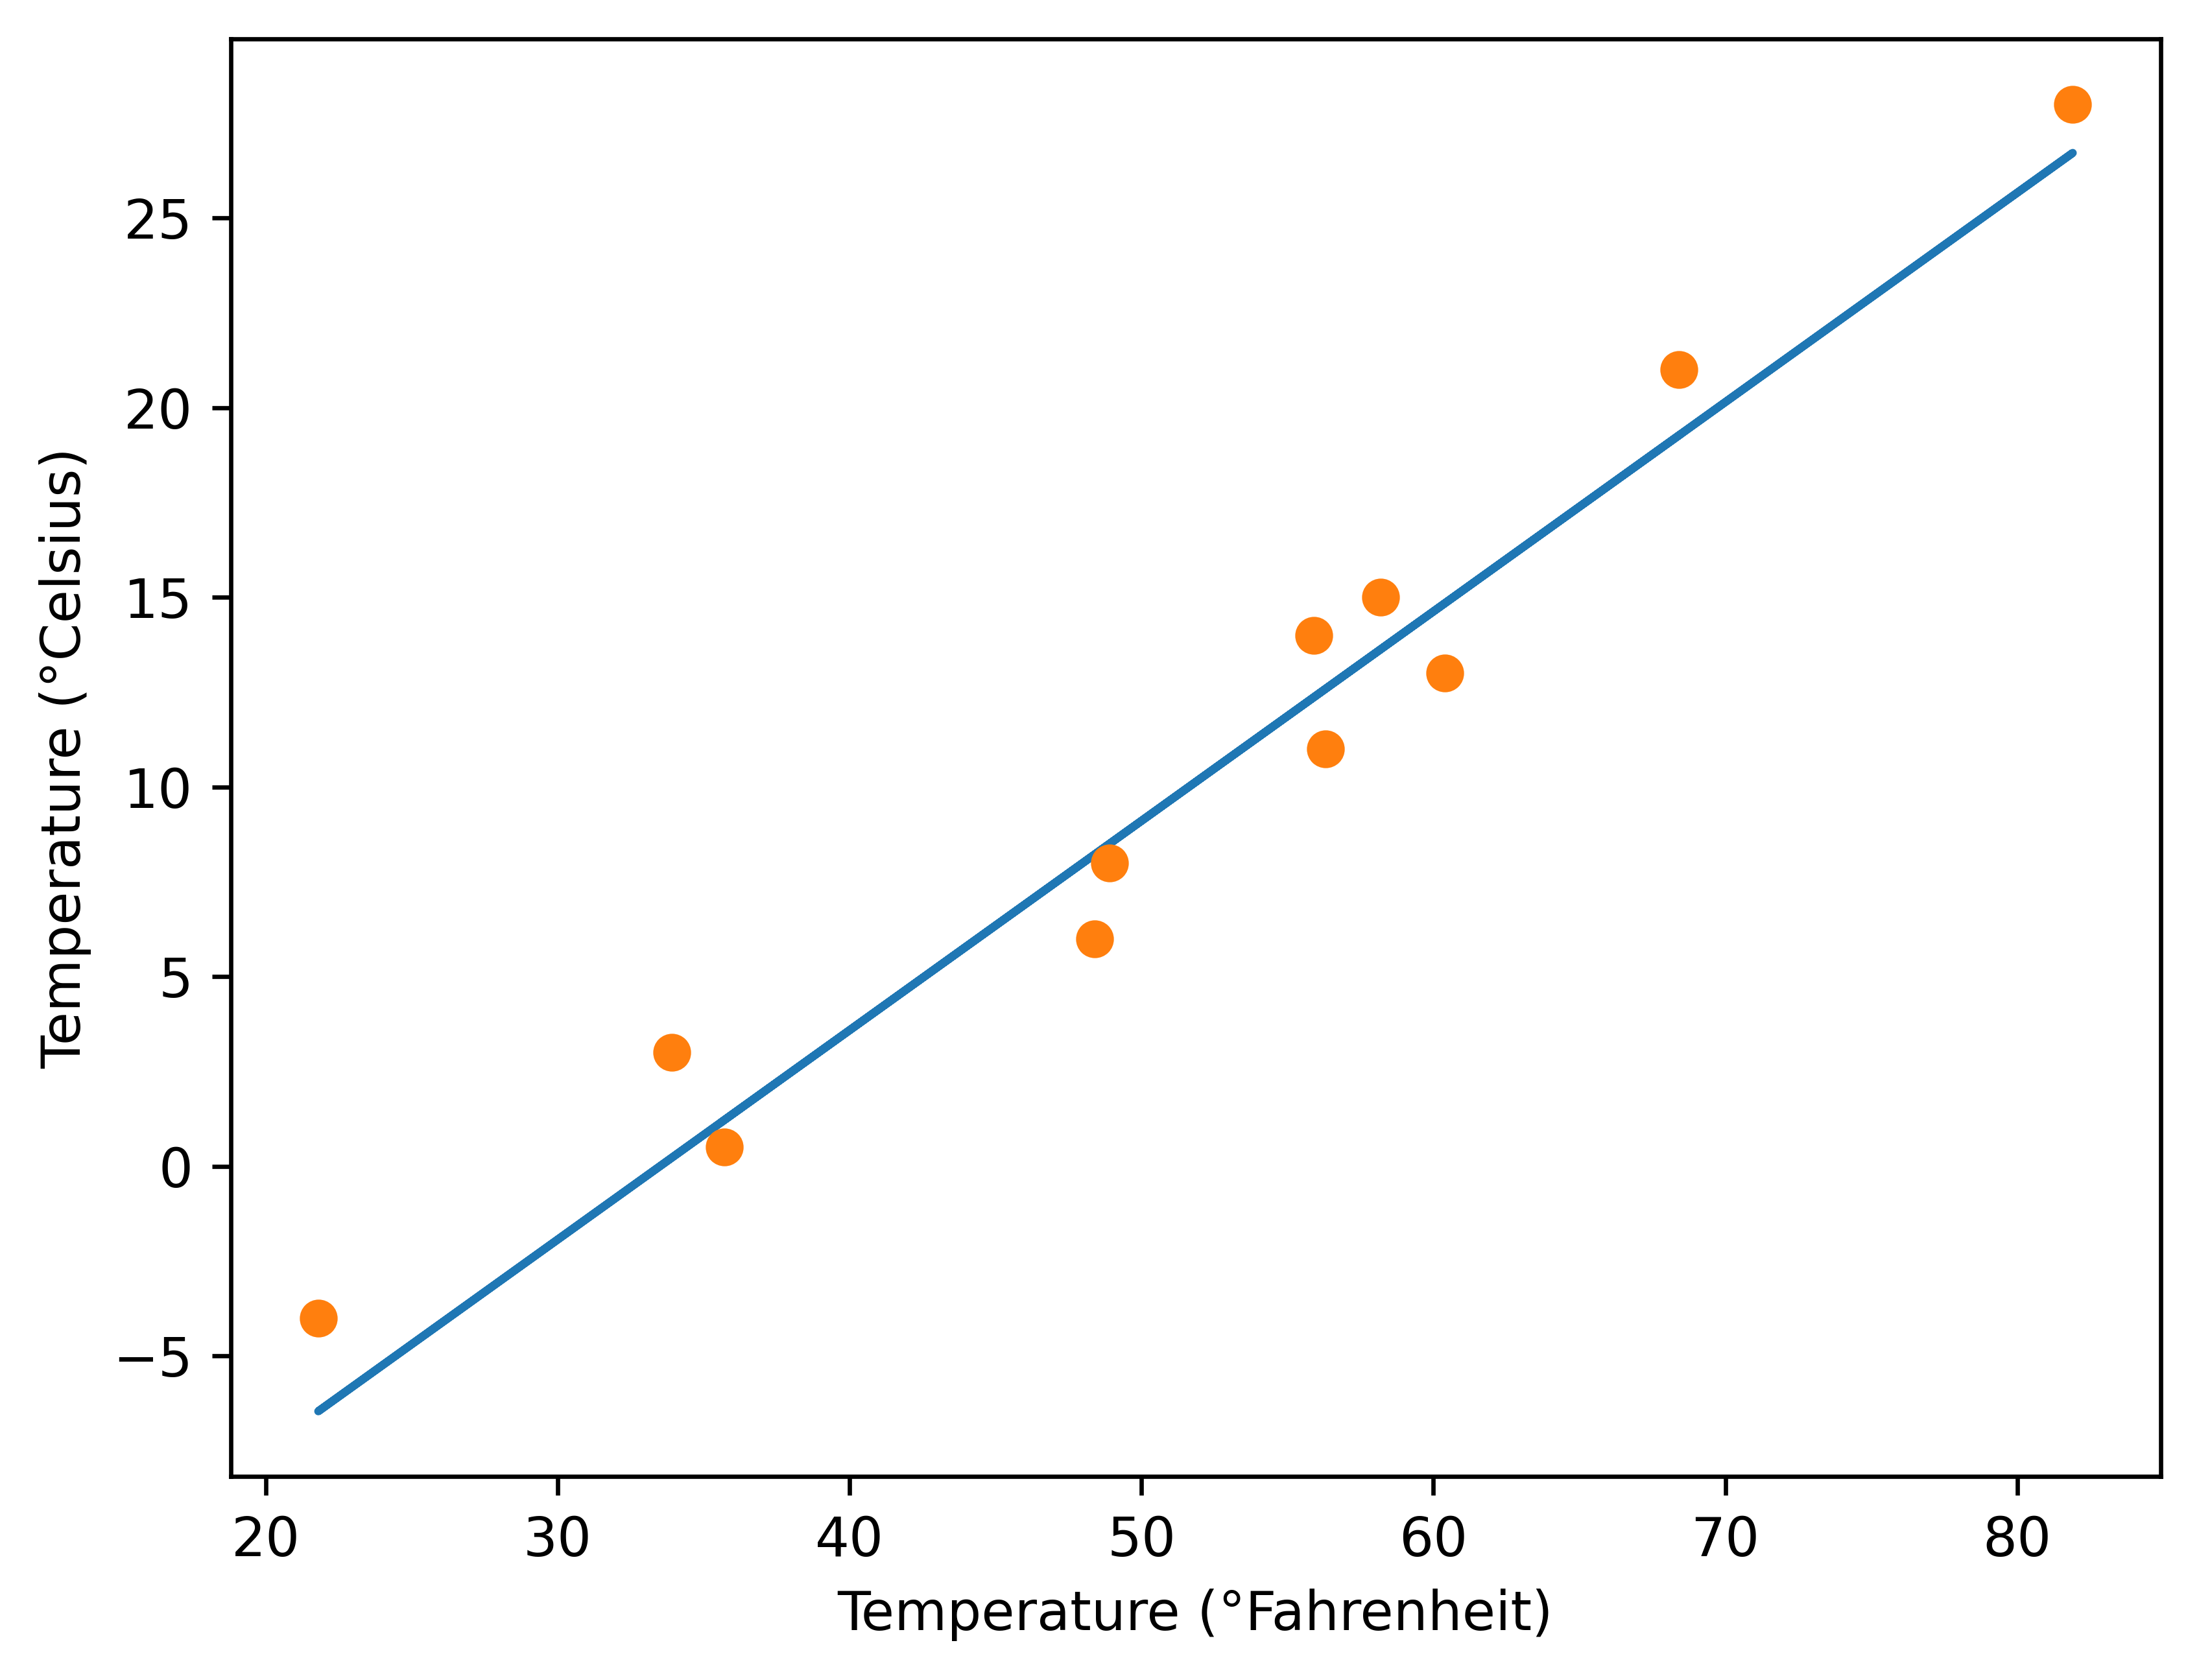

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')